In [1]:
# import basic packages
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import pypfopt
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

import yfinance as yf
# importing FinQuant's function to automatically build the portfolio
from finquant.portfolio import build_portfolio

In [2]:
# get the S&P 500
table=pd.read_html('https://en.wikipedia.org/wiki/list_of_S%26P_500_companies')
df = table[0]
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [4]:
tickers = df.Symbol.to_list()[:]+['^GSPC']
benchmark = ['^GSPC']

start_date = '2018-1-1'  # start day for lookback
end_date = '2019-1-1'  # end day for lookback

ohlc = yf.download(tickers, period="max",start=start_date, end=end_date)
ohlc.head()


[*********************100%***********************]  506 of 506 completed

7 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- CARR: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- VNT: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- WRK: No data found for this date range, symbol may be delisted
- OTIS: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- BRK.B: No data found, symbol may be delisted


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2018-01-02  65.877853  51.647556  104.940987  41.442081  83.965569  89.101776   
2018-01-03  67.554039  51.014027  105.890610  41.434864  85.279503  89.433365   
2018-01-04  67.047279  51.335667  109.797821  41.627323  84.793175  89.234398   
2018-01-05  68.119247  51.316177  110.965042  42.101261  86.269249  90.314545   
2018-01-08  68.265442  50.809345  110.183601  41.944889  84.887016  91.811577   

                                                           ...    Volume  \
                  ABMD        ABT         ACN        ADBE  ...       XOM   
Date                                                       ...             
2018-01-02  192.490005  55.684303  146.372726  177.699997  ...  11469300   
2018-01-03  195.820007  55.807426  147.048264  181.039993  ...  13957700   
2018-01-04  199.250000  55.712711  148.789413  183.220001  ...  10863000   
2018-01-05  202.320007  55.873722  150.016815  185.339996  ...  11047600   
2018-01-08  207.800003  55.712711  151.215637  185.039993  ...  10927100   

                                                                         \
               XRAY      XRX     XYL      YUM      ZBH    ZBRA     ZION   
Date                                                                      
2018-01-02  1622300  1776800  877800  1747800  1765300  310600  2387100   
2018-01-03  1533300  1907500  778800  2554900  1328800  253000  1575700   
2018-01-04  1052400  2565900  796500  1971200  1073200  435200  3309200   
2018-01-05  1329000  1542100  666800  1927100  1063400  301800  1212200   
2018-01-08  1188500  1282200  554700  1599400  1249500  218600  1697700   

                                 
                ZTS       ^GSPC  
Date                             
2018-01-02  2135600  3367250000  
2018-01-03  2328200  3538660000  
2018-01-04  2534000  3695260000  
2018-01-05  2166100  3236620000  
2018-01-08  3631400  3242650000  

[5 rows x 3036 columns]

In [5]:
prices = ohlc["Adj Close"]

pf = build_portfolio(data=prices)
pf.data.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.940987,41.442081,83.965569,89.101776,192.490005,55.684303,146.372726,177.699997,...,72.152405,65.490776,26.252438,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058,2695.810059
2018-01-03,67.554039,51.014027,105.890610,41.434864,85.279503,89.433365,195.820007,55.807426,147.048264,181.039993,...,73.569473,65.266426,26.216684,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651,2713.060059
2018-01-04,67.047279,51.335667,109.797821,41.627323,84.793175,89.234398,199.250000,55.712711,148.789413,183.220001,...,73.671303,65.256653,26.538473,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328,2723.989990
2018-01-05,68.119247,51.316177,110.965042,42.101261,86.269249,90.314545,202.320007,55.873722,150.016815,185.339996,...,73.611900,66.173569,26.735117,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262,2743.149902
2018-01-08,68.265442,50.809345,110.183601,41.944889,84.887016,91.811577,207.800003,55.712711,151.215637,185.039993,...,73.942833,66.622284,27.047966,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223,2747.709961


In [6]:
# Risk free rate
pf.risk_free_rate = 0.05
# Time window/frequency
pf.freq = 252

In [7]:
# ## Getting Skewness and Kurtosis of the stocks
print('Skewness of the stocks')
print(pf.skew)
print()
print('Kurtosis of the stocks')
print(pf.kurtosis)

Skewness of the stocks
A        0.465562
AAL      0.910003
AAP     -0.734448
AAPL     0.943536
ABBV     0.345550
           ...   
ZBH      0.504242
ZBRA     0.302451
ZION    -0.304264
ZTS      0.603275
^GSPC    0.251780
Length: 506, dtype: float64

Kurtosis of the stocks
A       -0.640088
AAL     -0.011843
AAP     -0.684154
AAPL     0.677407
ABBV     0.006401
           ...   
ZBH     -0.332717
ZBRA    -0.548696
ZION    -0.690537
ZTS     -0.973788
^GSPC    0.106198
Length: 506, dtype: float64


In [8]:
pf.comp_cumulative_returns().head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,


In [9]:
pf.comp_mean_returns().to_frame().T

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
0,0.159336,-0.225075,0.25072,0.320874,0.043892,0.009396,0.065666,0.23571,0.193654,0.356098,...,-0.034998,-0.035895,0.200453,0.11558,0.138468,0.127741,0.528135,0.0672,0.337967,0.102087


In [10]:
pf.comp_daily_log_returns().head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.025126,-0.012342,0.009008,-0.000174,0.015527,0.003715,0.017152,0.002209,0.004605,0.018621,...,0.019450,-0.003432,-0.001363,0.012119,-0.000858,0.006908,0.019668,-0.001184,0.004587,0.006378
2018-01-04,-0.007530,0.006285,0.036234,0.004634,-0.005719,-0.002227,0.017364,-0.001699,0.011771,0.011970,...,0.001383,-0.000150,0.012199,0.006654,0.010129,-0.001442,0.019567,0.004138,0.005946,0.004021
2018-01-05,0.015862,-0.000380,0.010575,0.011321,0.017258,0.012032,0.015290,0.002886,0.008215,0.011504,...,-0.000807,0.013953,0.007382,-0.001876,0.005811,0.009892,0.015456,0.000393,0.011379,0.007009
2018-01-08,0.002144,-0.009926,-0.007067,-0.003721,-0.016152,0.016440,0.026725,-0.002886,0.007959,-0.001620,...,0.004486,0.006758,0.011634,0.003605,0.001689,0.001903,0.009901,-0.004927,0.011924,0.001661
2018-01-09,0.024257,-0.000960,-0.008113,-0.000115,0.007510,0.006378,0.009388,0.001699,0.003329,0.008931,...,-0.004255,-0.042624,-0.002316,0.000288,-0.002655,-0.016214,0.030183,0.023236,0.011651,0.001302


In [11]:
# daily percentage changes of returns
pf.comp_daily_returns().head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015648,0.003721,0.017300,0.002211,0.004615,0.018796,...,0.019640,-0.003426,-0.001362,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598,0.006399
2018-01-04,-0.007502,0.006305,0.036899,0.004645,-0.005703,-0.002225,0.017516,-0.001697,0.011841,0.012042,...,0.001384,-0.000150,0.012274,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964,0.004029
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012105,0.015408,0.002890,0.008249,0.011571,...,-0.000806,0.014051,0.007410,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444,0.007034
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,0.027086,-0.002882,0.007991,-0.001619,...,0.004496,0.006781,0.011702,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011996,0.001662
2018-01-09,0.024554,-0.000959,-0.008080,-0.000115,0.007539,0.006398,0.009432,0.001700,0.003335,0.008971,...,-0.004246,-0.041728,-0.002313,0.000288,-0.002651,-0.016083,0.030643,0.023508,0.011719,0.001303


In [12]:
# cumulative returns (price_{t} - price_{t=0}) / price_{t=0}
pf.comp_cumulative_returns().head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,


In [13]:
from finquant.moving_average import sma
from finquant.moving_average import ema
# Simple Moving Average (SMA) is the arithmetic mean of a stock’s prices over a period of time. 
# The formula is:
# SMA = (P1 + P2 + P3 + … +Pn)/n

# compare with sma
# Exponential Moving Average (EMA) gives more weight to recent prices.

ema_span_50 = ema(pf.data,span=50)
ema_span_50.tail()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,79.174240,28.355629,156.841276,64.538512,78.978225,84.398253,187.351793,83.037483,194.643258,302.053210,...,64.154793,55.572094,34.306155,76.535358,100.073296,142.801947,240.771252,47.249276,122.942571,3109.607184
2019-12-26,79.386379,28.402889,156.888776,64.825509,79.180408,84.365434,186.710938,83.137211,195.166619,303.196222,...,64.185720,55.588760,34.361761,76.576087,100.065258,143.049375,241.306497,47.348464,123.300412,3114.717095
2019-12-27,79.589034,28.400238,156.898611,65.100183,79.351524,84.328509,186.026980,83.237643,195.675994,304.278331,...,64.206718,55.616814,34.408832,76.624507,100.061768,143.275818,241.882713,47.437718,123.652786,3119.630935
2019-12-30,79.770516,28.392221,156.938025,65.380803,79.490953,84.244099,185.292196,83.311066,196.104620,305.221926,...,64.212004,55.626676,34.448037,76.667158,100.009935,143.444359,242.362214,47.533673,123.950853,3123.617567
2019-12-31,79.960830,28.399365,157.016367,65.671122,79.625649,84.216169,184.715639,83.383916,196.513745,306.186164,...,64.227978,55.643532,34.484575,76.710072,99.963598,143.642473,242.875069,47.631534,124.242680,3127.820016


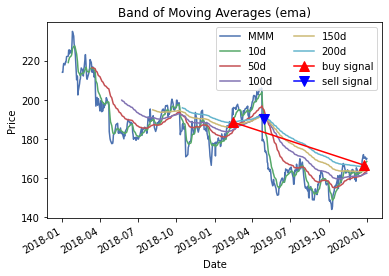

In [14]:
from finquant.moving_average import compute_ma
# get stock data for ...
dis = pf.get_stock("MMM").data.copy(deep=True)
# we want moving averages of 10, 50, 100, and 200 days.
spans = [10, 50, 100, 150, 200]
# compute and plot moving averages
dis_ma = compute_ma(dis, ema, spans, plot=True)
plt.show()

In [15]:
ma = dis.copy(deep=True)
for span in spans:
    ma[str(span) + "d"] = ema(dis, span=span)
ma.tail()

,MMM,10d,50d,100d,150d,200d
Date,,,,,,
2019-12-24,170.337433,166.719767,162.476447,161.976995,163.746521,166.148813
2019-12-26,170.250656,167.361747,162.781318,162.140830,163.832668,166.189627
2019-12-27,170.896606,168.004449,163.099565,162.314212,163.926231,166.236462
2019-12-30,169.517944,168.279630,163.351266,162.456860,164.000293,166.269114
2019-12-31,170.086777,168.608202,163.615404,162.607947,164.080909,166.307101


In [16]:

# Create buy/sell signals of shortest and longest span
minspan = min(spans)
minlabel = str(minspan) + "d"
maxspan = max(spans)
maxlabel = str(maxspan) + "d"
signals = ma.copy(deep=True)
signals["diff"] = 0.0
signals["diff"][minspan:] = np.where(
    ma[minlabel][minspan:] > ma[maxlabel][minspan:], 1.0, 0.0
)
# Generate trading orders
signals["signal"] = signals["diff"].diff()


In [17]:
# Mark Minervini’s Trend Template
# https://zhuanlan.zhihu.com/p/165379657
signals.tail()

,MMM,10d,50d,100d,150d,200d,diff,signal
Date,,,,,,,,
2019-12-24,170.337433,166.719767,162.476447,161.976995,163.746521,166.148813,1.0,1.0
2019-12-26,170.250656,167.361747,162.781318,162.140830,163.832668,166.189627,1.0,0.0
2019-12-27,170.896606,168.004449,163.099565,162.314212,163.926231,166.236462,1.0,0.0
2019-12-30,169.517944,168.279630,163.351266,162.456860,164.000293,166.269114,1.0,0.0
2019-12-31,170.086777,168.608202,163.615404,162.607947,164.080909,166.307101,1.0,0.0


In [18]:
benchmark_ann_ret = ohlc['Close'][benchmark].pct_change(252).iloc[-1]
benchmark_ann_ret

^GSPC    0.288781
Name: 2019-12-31 00:00:00, dtype: float64

In [19]:
# 1. The current stock price is above both the 150-day and 200-day moving average
# 2. The 150-day moving average is above the 200-day moving average
# 3. The 200-day moving average line is trending up for at least 1 month
# 4. The 50-day moving average is above both the 150-day and 200-day moving averages
# 5. The current stock price is trading above the 50-day moving average
# 6. The current stock price is at least 30% above it’s 52-week low
# 7. The current stock price is within at least 25% of its 52-week high
# 8. The relative strength ranking (as reported in Investor’s Business Daily) is no less than 70. Preferably in the 80s or 90s.

# select stocks function
def screen(close: pd.Series, benchmark_ann_ret: float) -> pd.Series:
    # 计算50，150，200日均线
    ema_50 = ema(close, 50).iloc[-1]
    ema_150 = ema(close, 150).iloc[-1]
    ema_200 = ema(close, 200).iloc[-1]

    # 200日均线的20日移动平滑，用于判断200日均线是否上升
    ema_200_smooth = ema(ema(close, 200), 20).iloc[-1]

    # 收盘价的52周高点和52周低点
    high_52week = close.rolling(52 * 5).max().iloc[-1]
    low_52week = close.rolling(52 * 5).min().iloc[-1]

    # 最近收盘价
    cl = float(dis.iloc[-1])

    # 1. The current stock price is above both the 150-day and 200-day moving average
    if cl > ema_150 and cl > ema_200:
        condition_1 = True
    else:
        condition_1 = False

    # 2. The 150-day moving average is above the 200-day moving average
    if ema_150 > ema_200:
        condition_2 = True
    else:
        condition_2 = False

    # 3. The 200-day moving average line is trending up for at least 1 month
    if ema_200 > ema_200_smooth:
        condition_3 = True
    else:
        condition_3 = False

    # 4. The 50-day moving average is above both the 150-day and 200-day moving averages
    if ema_50 > ema_150 and ema_50 > ema_200:
        condition_4 = True
    else:
        condition_4 = False

    # 5. The current stock price is trading above the 50-day moving average
    if cl > ema_50:
        condition_5 = True
    else:
        condition_5 = False

    # 6. The current stock price is at least 30% above it’s 52-week low
    if cl >= low_52week * 1.3:
        condition_6 = True
    else:
        condition_6 = False

    # 7. The current stock price is within at least 25% of its 52-week high
    if cl >= high_52week * 0.75 and cl <= high_52week * 1.25:
        condition_7 = True
    else:
        condition_7 = False

    # 8. The relative strength ranking (as reported in Investor’s Business Daily) is no less than 70. Preferably in the 80s or 90s.
    rs = close.pct_change(252).iloc[-1] / float(benchmark_ann_ret) * 100
    if rs >= 70:
        condition_8 = True
    else:
        condition_8 = False


    # 判断股票是否符合标准
    if (condition_1 and condition_2 and condition_3 and
        condition_4 and condition_5 and condition_6 and
        condition_7 and condition_8):
        meet_criterion = True
    else:
        meet_criterion = False

    out = {
        "rs": round(rs, 2),
        "close": cl,
        "ema_50": ema_50,
        "ema_150": ema_150,
        "ema_200": ema_200,
        "high_52week": high_52week,
        "low_52week": low_52week,
        "meet_criterion": meet_criterion
    }

    return pd.Series(out)




In [20]:
results = prices.apply(screen, benchmark_ann_ret=benchmark_ann_ret)
results = results.T

meet_criterion = results[results['meet_criterion'] == True]
meet_criterion

,rs,close,ema_50,ema_150,ema_200,high_52week,low_52week,meet_criterion
ADP,113.26,170.087,163.032,158.781,156.406,167.41,116.655,True
AMP,221.49,170.087,155.502,144.779,142.196,163.992,92.4841,True
ARE,152.5,170.087,153.004,146.589,143.674,157.337,103.644,True
CB,79.43,170.087,149.053,146.402,144.572,157.253,114.868,True
CCI,122.76,170.087,131.993,128.977,126.729,142.096,97.3023,True
CDW,270.87,170.087,133.303,120.872,116.307,142.79,73.5436,True
DG,158.27,170.087,154.952,146.854,142.296,164.216,96.9736,True
DHR,171.6,170.087,145.361,138.858,135.726,152.845,93.8541,True
DIS,116.05,170.087,142.732,136.394,133.745,150.737,99.1384,True
EFX,181.15,170.087,137.102,133.913,131.684,144.925,88.0258,True


In [21]:
portfolio = meet_criterion.T
portfolio

,ADP,AMP,ARE,CB,CCI,CDW,DG,DHR,DIS,EFX,...,STE,SWK,UHS,URI,VAR,VMC,VRSK,WHR,WST,ZBH
rs,113.26,221.49,152.5,79.43,122.76,270.87,158.27,171.6,116.05,181.15,...,152.67,142.58,81.79,216.96,87.71,163.22,131.3,148.33,187.45,157.12
close,170.087,170.087,170.087,170.087,170.087,170.087,170.087,170.087,170.087,170.087,...,170.087,170.087,170.087,170.087,170.087,170.087,170.087,170.087,170.087,170.087
ema_50,163.032,155.502,153.004,149.053,131.993,133.303,154.952,145.361,142.732,137.102,...,147.883,154.963,142.388,153.108,133.309,140.807,147.002,142.526,146.521,143.642
ema_150,158.781,144.779,146.589,146.402,128.977,120.872,146.854,138.858,136.394,133.913,...,142.419,145.657,139.76,138.366,126.907,136.712,145.611,139.108,137.955,135.428
ema_200,156.406,142.196,143.674,144.572,126.729,116.307,142.296,135.726,133.745,131.684,...,139.228,143.378,138.019,136.462,126.071,134.043,143.141,137.247,134.002,132.684
high_52week,167.41,163.992,157.337,157.253,142.096,142.79,164.216,152.845,150.737,144.925,...,153.24,164.717,154.907,169.82,143.26,149.622,163.001,155.556,150.652,149.805
low_52week,116.655,92.4841,103.644,114.868,97.3023,73.5436,96.9736,93.8541,99.1384,88.0258,...,97.686,107.098,112.746,95.9,105.07,89.1359,101.679,95.0654,92.1879,95.5306
meet_criterion,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [22]:
tickers = portfolio.columns.to_list()
market_prices = prices[tickers]

market_prices.head()

,ADP,AMP,ARE,CB,CCI,CDW,DG,DHR,DIS,EFX,...,STE,SWK,UHS,URI,VAR,VMC,VRSK,WHR,WST,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,108.654259,156.990677,119.393761,133.041534,98.134827,67.332443,91.219177,91.036125,108.726067,115.363235,...,85.578125,159.280060,114.545494,173.580002,110.980003,127.932121,94.564079,151.893127,98.066849,121.132782
2018-01-03,109.834579,156.214539,118.833229,134.088669,97.720406,69.301430,91.151299,92.247452,109.192856,115.961563,...,84.444313,159.866165,112.355652,175.190002,111.309998,130.279861,94.287781,152.661682,98.185112,121.972481
2018-01-04,110.883766,156.787384,116.462448,134.630936,96.585281,70.517578,92.218079,92.690620,109.144241,117.389862,...,83.911331,160.489960,111.761139,172.000000,109.860001,129.397003,94.761436,152.643646,98.155556,121.796738
2018-01-05,110.818184,157.323273,116.701355,134.873993,97.324036,70.401764,92.829041,93.271645,108.551003,118.538284,...,84.260193,161.236694,110.948601,171.380005,110.870003,127.961220,95.600212,152.336197,99.387543,123.007484
2018-01-08,110.480949,158.921738,116.958649,134.191513,97.612312,70.507942,91.555161,93.803459,106.994995,117.727631,...,86.062630,163.202789,109.145195,172.449997,111.400002,129.940323,95.718628,152.851593,99.949333,123.241814


In [23]:
# mcaps = {}
# for t in tickers:
#     stock = yf.Ticker(t)
#     mcaps[t] = stock.info["marketCap"]
# mcaps

In [24]:
S = risk_models.CovarianceShrinkage(market_prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

ADP     5.082548
AMP     0.455291
ARE     3.996228
CB      1.986392
CCI     4.585310
CDW     5.663479
DG      4.770549
DHR     6.060090
DIS     3.125466
EFX     1.814703
FIS     5.484273
HCA     4.043179
HSY     4.545950
IEX     3.281654
IQV     3.816986
IT      1.848954
ITW     1.333759
KLAC    2.803045
KMB     2.299848
KSU     3.414957
LH      0.521511
MAR     1.436579
MCK    -0.531038
MSFT    5.545433
MSI     5.849006
MTB     0.473115
PNC     1.755369
RMD     4.063181
SNPS    4.140660
SRE     5.466717
STE     7.249111
SWK     0.406543
UHS     2.172977
URI     0.243433
VAR     2.007610
VMC     0.927369
VRSK    6.908134
WHR    -0.016759
WST     3.702397
ZBH     2.098303
dtype: float64

In [25]:
# Covariance Matrix
S

,ADP,AMP,ARE,CB,CCI,CDW,DG,DHR,DIS,EFX,...,STE,SWK,UHS,URI,VAR,VMC,VRSK,WHR,WST,ZBH
ADP,0.042788,0.028535,0.015226,0.017623,0.012651,0.026975,0.017378,0.023298,0.019339,0.021554,...,0.019866,0.027132,0.014303,0.035639,0.022414,0.020316,0.023229,0.017781,0.022077,0.022893
AMP,0.028535,0.077230,0.014038,0.023821,0.005657,0.027678,0.021192,0.025063,0.026050,0.023730,...,0.021632,0.048099,0.022557,0.067472,0.027910,0.026255,0.022126,0.040074,0.024585,0.027850
ARE,0.015226,0.014038,0.034581,0.012447,0.016995,0.012796,0.013431,0.014321,0.012210,0.012170,...,0.012144,0.013181,0.009619,0.017257,0.013255,0.010137,0.012347,0.016239,0.012325,0.014585
CB,0.017623,0.023821,0.012447,0.031818,0.010735,0.012697,0.010454,0.016979,0.013129,0.017370,...,0.013971,0.018438,0.012189,0.020958,0.015107,0.013284,0.015140,0.015057,0.014858,0.016233
CCI,0.012651,0.005657,0.016995,0.010735,0.037445,0.007198,0.009373,0.009094,0.007958,0.009669,...,0.010525,0.004640,0.006148,0.007976,0.008040,0.011330,0.010867,0.009027,0.010666,0.012140
CDW,0.026975,0.027678,0.012796,0.012697,0.007198,0.067632,0.019921,0.023358,0.018615,0.021907,...,0.025338,0.031736,0.015001,0.039704,0.025087,0.020889,0.020883,0.021505,0.024138,0.021233
DG,0.017378,0.021192,0.013431,0.010454,0.009373,0.019921,0.057220,0.015920,0.014756,0.014051,...,0.014578,0.023180,0.014159,0.031313,0.015500,0.018278,0.013848,0.020961,0.013286,0.013975
DHR,0.023298,0.025063,0.014321,0.016979,0.009094,0.023358,0.015920,0.043569,0.016119,0.016658,...,0.023089,0.026671,0.014685,0.034489,0.024941,0.017400,0.020181,0.018538,0.023179,0.022906
DIS,0.019339,0.026050,0.012210,0.013129,0.007958,0.018615,0.014756,0.016119,0.047116,0.014216,...,0.014669,0.020979,0.013778,0.033193,0.011838,0.016318,0.016026,0.018903,0.016692,0.014076
EFX,0.021554,0.023730,0.012170,0.017370,0.009669,0.021907,0.014051,0.016658,0.014216,0.055643,...,0.017880,0.024715,0.015774,0.029674,0.020941,0.021791,0.018802,0.014626,0.019755,0.019903


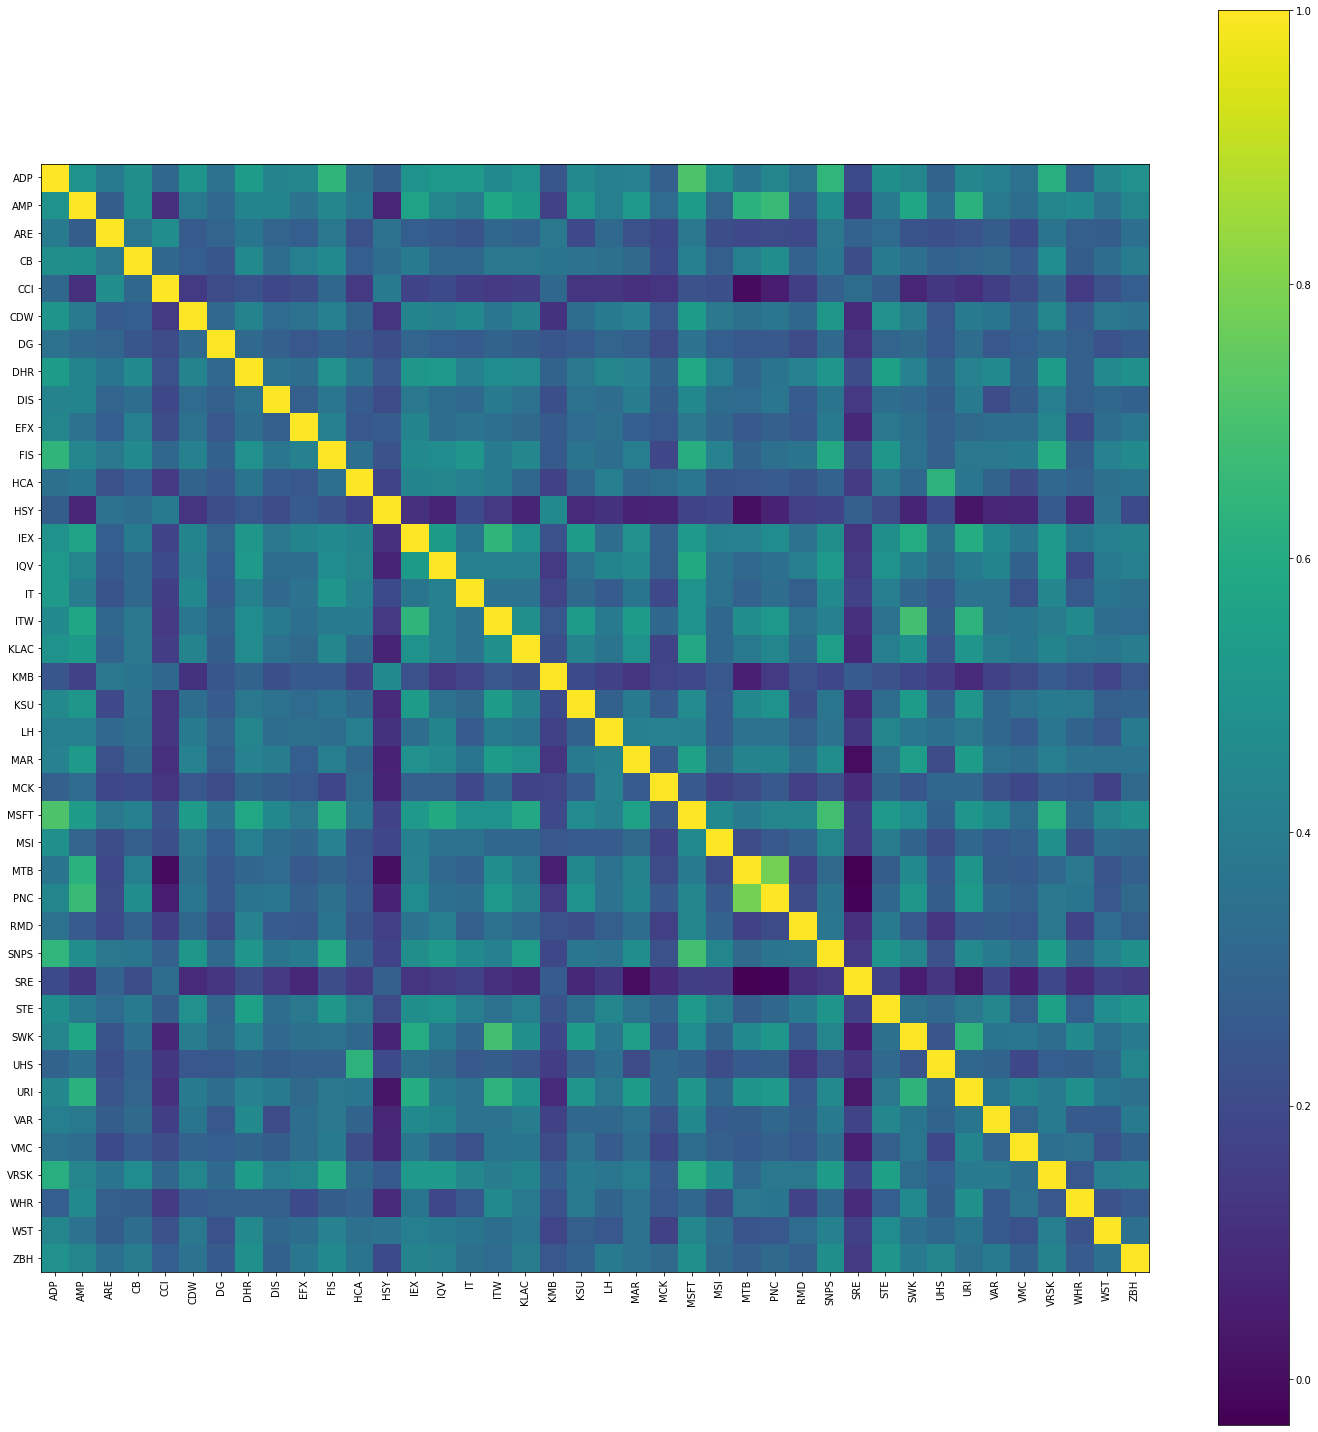

In [26]:
plt.rcParams['figure.figsize'] = (20.0, 20.0) # 单位是inches
plotting.plot_covariance(S, plot_correlation=True, );

In [27]:
pf = build_portfolio(data=market_prices)
pf.data.head()

,ADP,AMP,ARE,CB,CCI,CDW,DG,DHR,DIS,EFX,...,STE,SWK,UHS,URI,VAR,VMC,VRSK,WHR,WST,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,108.654259,156.990677,119.393761,133.041534,98.134827,67.332443,91.219177,91.036125,108.726067,115.363235,...,85.578125,159.280060,114.545494,173.580002,110.980003,127.932121,94.564079,151.893127,98.066849,121.132782
2018-01-03,109.834579,156.214539,118.833229,134.088669,97.720406,69.301430,91.151299,92.247452,109.192856,115.961563,...,84.444313,159.866165,112.355652,175.190002,111.309998,130.279861,94.287781,152.661682,98.185112,121.972481
2018-01-04,110.883766,156.787384,116.462448,134.630936,96.585281,70.517578,92.218079,92.690620,109.144241,117.389862,...,83.911331,160.489960,111.761139,172.000000,109.860001,129.397003,94.761436,152.643646,98.155556,121.796738
2018-01-05,110.818184,157.323273,116.701355,134.873993,97.324036,70.401764,92.829041,93.271645,108.551003,118.538284,...,84.260193,161.236694,110.948601,171.380005,110.870003,127.961220,95.600212,152.336197,99.387543,123.007484
2018-01-08,110.480949,158.921738,116.958649,134.191513,97.612312,70.507942,91.555161,93.803459,106.994995,117.727631,...,86.062630,163.202789,109.145195,172.449997,111.400002,129.940323,95.718628,152.851593,99.949333,123.241814


In [28]:
# 1. set the new value(s)
pf.freq = 252
pf.risk_free_rate = 0.1

# 2.a compute and get new values based on new freq/risk_free_rate
exret = pf.comp_expected_return(freq=252)
vol = pf.comp_volatility(freq=252)
sharpe = pf.comp_sharpe()
print(
    "For {} trading days and a risk free rate of {}:".format(pf.freq, pf.risk_free_rate)
)
print("Expected return: {:0.3f}".format(exret))
print("Volatility: {:0.3f}".format(vol))
print("Sharpe Ratio: {:0.3f}".format(sharpe))

# 2.b print out properties of portfolio (which is based on new freq/risk_free_rate)
pf.properties()

For 252 trading days and a risk free rate of 0.1:
Expected return: 0.182
Volatility: 0.145
Sharpe Ratio: 0.569
----------------------------------------------------------------------
Stocks: ADP, AMP, ARE, CB, CCI, CDW, DG, DHR, DIS, EFX, FIS, HCA, HSY, IEX, IQV, IT, ITW, KLAC, KMB, KSU, LH, MAR, MCK, MSFT, MSI, MTB, PNC, RMD, SNPS, SRE, STE, SWK, UHS, URI, VAR, VMC, VRSK, WHR, WST, ZBH
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.182
Portfolio Volatility: 0.145
Portfolio Sharpe Ratio: 0.569

Skewness:
        ADP       AMP       ARE        CB      CCI       CDW        DG  \
0 -0.280877 -0.085519  0.523433  0.402553  0.43434  0.686141  0.672162   

        DHR       DIS       EFX  ...       STE      SWK       UHS       URI  \
0  0.387817  0.499613 -0.271772  ...  0.167052  0.06623  0.465557  0.165652   

       VAR       VMC      VRSK       WHR       WST       ZBH  
0  0.31934 -0.068604  0.266508 -0.316508  0.472588  0.504242  

[1 rows x 40 columns]

Kurt

In [29]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.164
Annual Volatility: 0.112
Sharpe Ratio: 0.573

Optimal weights:
            ADP           AMP       ARE        CB       CCI  CDW        DG  \
Allocation  0.0  2.844799e-17  0.035007  0.013213  0.113912  0.0  0.023206   

            DHR       DIS       EFX  ...       STE           SWK       UHS  \
Allocation  0.0  0.018764  0.006889  ...  0.027087  1.709189e-17  0.045434   

                     URI  VAR       VMC      VRSK           WHR           WST  \
Allocation  1.321374e-17  0.0  0.018799  0.024161  5.123397e-18  1.068966e-17   

                     ZBH  
Allocation  4.804607e-18  

[1 rows x 40 columns]
----------------------------------------------------------------------


,Allocation
ADP,0.000000e+00
AMP,2.844799e-17
ARE,3.500686e-02
CB,1.321273e-02
CCI,1.139122e-01
CDW,0.000000e+00
DG,2.320562e-02
DHR,0.000000e+00
DIS,1.876396e-02
EFX,6.888749e-03


In [30]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.164
Annual Volatility: 0.112
Sharpe Ratio: 0.573

Optimal weights:
            ADP           AMP       ARE        CB       CCI  CDW        DG  \
Allocation  0.0  2.844799e-17  0.035007  0.013213  0.113912  0.0  0.023206   

            DHR       DIS       EFX  ...       STE           SWK       UHS  \
Allocation  0.0  0.018764  0.006889  ...  0.027087  1.709189e-17  0.045434   

                     URI  VAR       VMC      VRSK           WHR           WST  \
Allocation  1.321374e-17  0.0  0.018799  0.024161  5.123397e-18  1.068966e-17   

                     ZBH  
Allocation  4.804607e-18  

[1 rows x 40 columns]
----------------------------------------------------------------------


,Allocation
ADP,0.000000e+00
AMP,2.844799e-17
ARE,3.500686e-02
CB,1.321273e-02
CCI,1.139122e-01
CDW,0.000000e+00
DG,2.320562e-02
DHR,0.000000e+00
DIS,1.876396e-02
EFX,6.888749e-03


In [31]:
# optimisation for maximum Sharpe ratio
opt_weights = pf.ef_maximum_sharpe_ratio()

opt_weights[opt_weights['Allocation']> 0.01]

,Allocation
CDW,0.238580
DG,0.103916
HCA,0.068849
MSI,0.167773
RMD,0.118197
SRE,0.206929
STE,0.092851


In [32]:

lst = opt_weights[opt_weights['Allocation']> 0.01].index.tolist()
lst

['CDW', 'DG', 'HCA', 'MSI', 'RMD', 'SRE', 'STE']

In [33]:
pf = build_portfolio(data=market_prices[lst])
pf.data.head()

,CDW,DG,HCA,MSI,RMD,SRE,STE
Date,,,,,,,
2018-01-02,67.332443,91.219177,86.883507,86.136032,82.547127,95.656052,85.578125
2018-01-03,69.301430,91.151299,84.485985,85.527229,83.406067,98.189331,84.444313
2018-01-04,70.517578,92.218079,83.437668,86.240677,83.521904,97.535576,83.911331
2018-01-05,70.401764,92.829041,84.379219,87.401192,84.631798,98.470787,84.260193
2018-01-08,70.507942,91.555161,84.204491,88.295380,85.114365,98.498055,86.062630


In [34]:

pf.freq = 252
pf.risk_free_rate = 0


In [35]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0
Expected annual Return: 0.286
Annual Volatility: 0.135
Sharpe Ratio: 2.112

Optimal weights:
                 CDW        DG       HCA       MSI       RMD       SRE  \
Allocation  0.041869  0.147462  0.080961  0.120425  0.058732  0.366135   

                 STE  
Allocation  0.184416  
----------------------------------------------------------------------


,Allocation
CDW,0.041869
DG,0.147462
HCA,0.080961
MSI,0.120425
RMD,0.058732
SRE,0.366135
STE,0.184416


In [36]:
# optimisation for maximum Sharpe ratio
pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0
Expected annual Return: 0.310
Annual Volatility: 0.141
Sharpe Ratio: 2.197

Optimal weights:
                 CDW        DG       HCA       MSI       RMD       SRE  \
Allocation  0.170355  0.119871  0.072904  0.152029  0.097481  0.262238   

                 STE  
Allocation  0.125122  
----------------------------------------------------------------------


,Allocation
CDW,0.170355
DG,0.119871
HCA,0.072904
MSI,0.152029
RMD,0.097481
SRE,0.262238
STE,0.125122


In [37]:
# minimum volatility for a given target return of 0.26
minimum = pf.ef_efficient_return(0.26, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Return

Time window/frequency: 252
Risk free rate: 0
Expected annual Return: 0.260
Annual Volatility: 0.146
Sharpe Ratio: 1.782

Optimal weights:
            CDW        DG       HCA       MSI  RMD       SRE       STE
Allocation  0.0  0.161731  0.074274  0.000494  0.0  0.578854  0.184647
----------------------------------------------------------------------


In [59]:
# maximum Sharpe ratio for a given target volatility of 0.22
maximum = pf.ef_efficient_volatility(0.15, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Volatility

Time window/frequency: 252
Risk free rate: 0
Expected annual Return: 0.325
Annual Volatility: 0.150
Sharpe Ratio: 2.168

Optimal weights:
                 CDW        DG       HCA       MSI       RMD       SRE  \
Allocation  0.254798  0.101538  0.067707  0.172075  0.122788  0.195065   

                STE  
Allocation  0.08603  
----------------------------------------------------------------------


In [38]:
market_prices[lst]

,CDW,DG,HCA,MSI,RMD,SRE,STE
Date,,,,,,,
2018-01-02,67.332443,91.219177,86.883507,86.136032,82.547127,95.656052,85.578125
2018-01-03,69.301430,91.151299,84.485985,85.527229,83.406067,98.189331,84.444313
2018-01-04,70.517578,92.218079,83.437668,86.240677,83.521904,97.535576,83.911331
2018-01-05,70.401764,92.829041,84.379219,87.401192,84.631798,98.470787,84.260193
2018-01-08,70.507942,91.555161,84.204491,88.295380,85.114365,98.498055,86.062630
...,...,...,...,...,...,...,...
2019-12-24,141.151047,154.756882,147.158325,158.941086,155.377121,144.352539,150.643906
2019-12-26,142.789902,153.825867,147.446716,158.646179,154.474777,145.281998,149.970093
2019-12-27,142.128464,155.153046,148.431213,158.714981,154.881332,145.492233,150.425903


In [39]:
minimum.Allocation

CDW    0.000000
DG     0.161731
HCA    0.074274
MSI    0.000494
RMD    0.000000
SRE    0.578854
STE    0.184647
Name: Allocation, dtype: float64

In [40]:
market_prices[lst]*minimum.Allocation

,CDW,DG,HCA,MSI,RMD,SRE,STE
Date,,,,,,,
2018-01-02,0.0,14.752947,6.453218,0.042540,0.0,55.370879,15.801752
2018-01-03,0.0,14.741969,6.275143,0.042239,0.0,56.837278,15.592397
2018-01-04,0.0,14.914500,6.197280,0.042592,0.0,56.458849,15.493984
2018-01-05,0.0,15.013311,6.267213,0.043165,0.0,57.000200,15.558400
2018-01-08,0.0,14.807285,6.254235,0.043606,0.0,57.015984,15.891215
...,...,...,...,...,...,...,...
2019-12-24,0.0,25.028948,10.930092,0.078496,0.0,83.559031,27.815960
2019-12-26,0.0,24.878374,10.951512,0.078351,0.0,84.097052,27.691542
2019-12-27,0.0,25.093020,11.024635,0.078385,0.0,84.218748,27.775706


In [41]:
sp500 = prices['^GSPC'].to_frame()
sp500

,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020


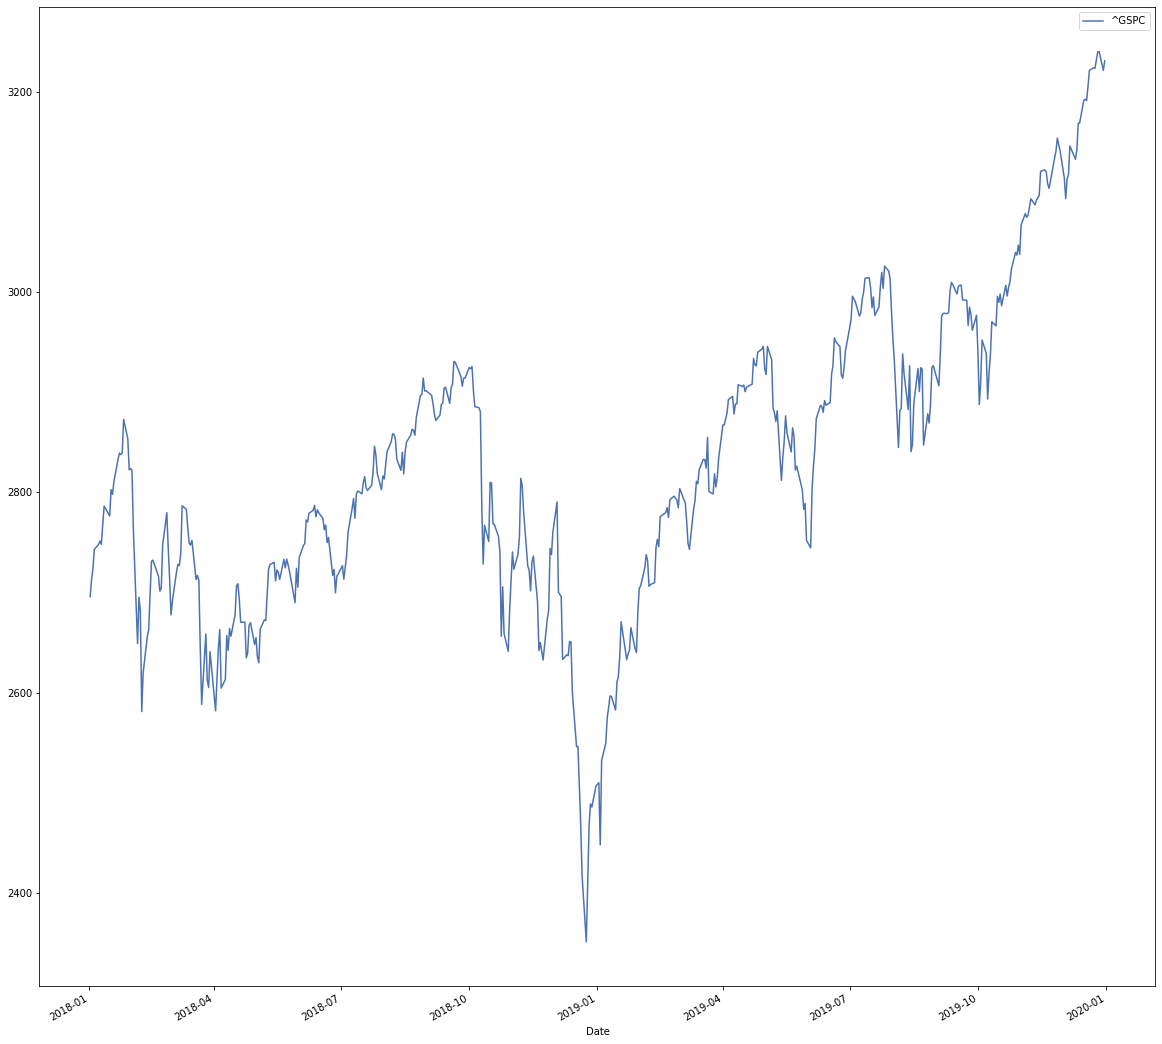

In [55]:
pf1 = build_portfolio(data=sp500)
pf1.data.plot()
pf1.freq = 252
pf1.risk_free_rate = 0.1

In [56]:
pf1.properties()

----------------------------------------------------------------------
Stocks: ^GSPC
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.102
Portfolio Volatility: 0.150
Portfolio Sharpe Ratio: 0.014

Skewness:
     ^GSPC
0  0.25178

Kurtosis:
      ^GSPC
0  0.106198

Information:
   Allocation   Name
0         1.0  ^GSPC
----------------------------------------------------------------------


<AxesSubplot:xlabel='Date'>

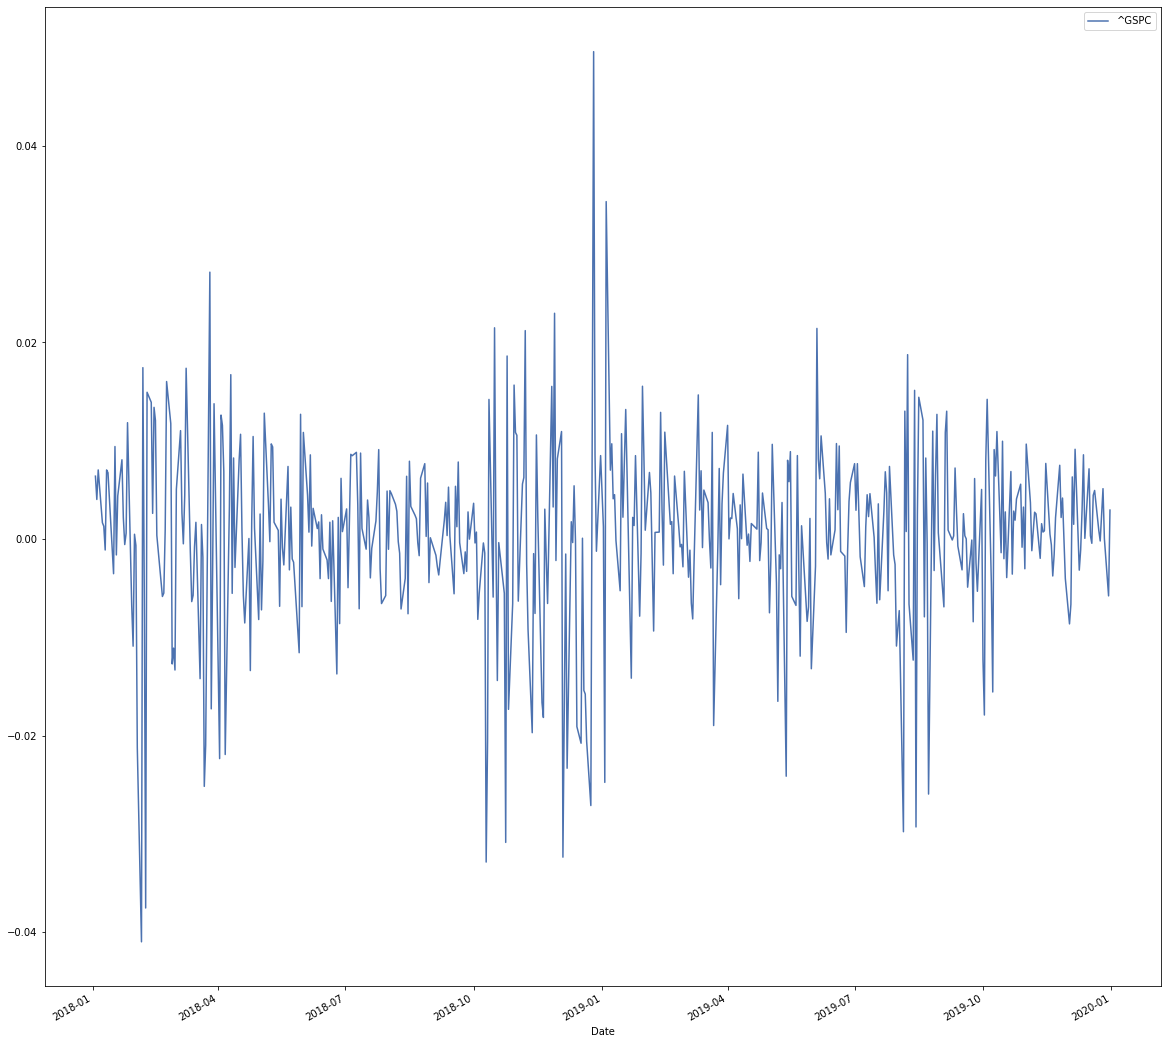

In [50]:
pf1.comp_daily_returns().plot()

<AxesSubplot:xlabel='Date'>

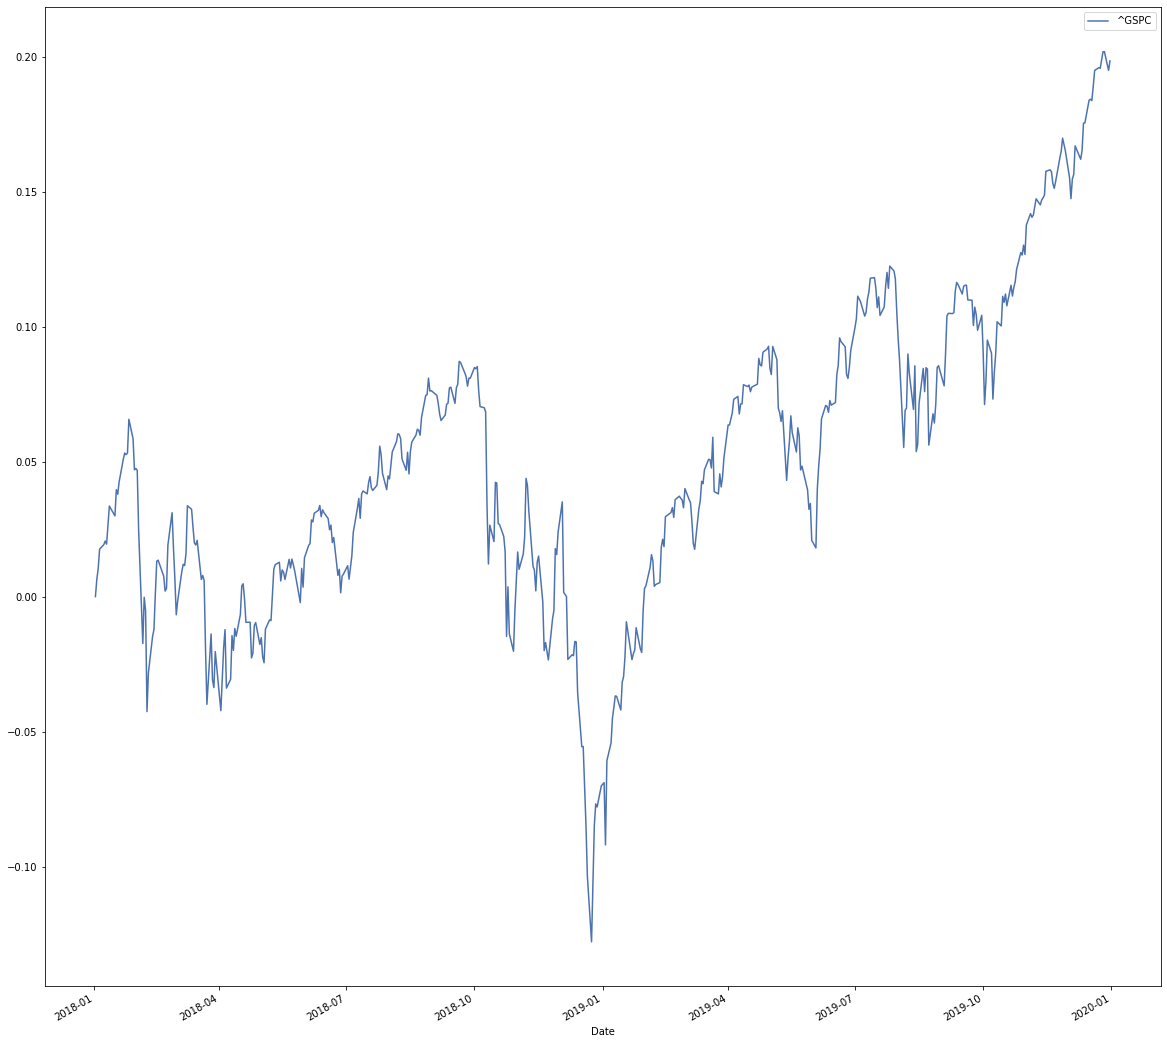

In [53]:
pf1.comp_cumulative_returns().plot()